In [1]:
import os
os.chdir('..')
from matplotlib import pyplot as plt
import numpy as np

import virl

In [2]:

def analysis(states, rewards, avg_episode_rewards):
    fig, axes = plt.subplots(2, 2, figsize=(20, 8))
    labels = ['s[0]: susceptibles', 's[1]: infectious', 's[2]: quarantined', 's[3]: recovereds']
    states = np.array(states)
    for i in range(4):
        axes[0, 0].plot(states[:,i], label=labels[i]);
    axes[0, 0].set_xlabel('weeks since start of epidemic')
    axes[0, 0].set_ylabel('State s(t)')
    axes[0, 0].legend()
    axes[0, 1].plot(rewards);
    axes[0, 1].set_title('Reward (for one run)')
    axes[0, 1].set_xlabel('weeks since start of epidemic')
    axes[0, 1].set_ylabel('reward r(t)')
    axes[1, 0].plot(avg_episode_rewards);
    axes[1, 0].set_title('Reward')
    axes[1, 0].set_xlabel('episode')
    axes[1, 0].set_ylabel('mean reward r(t)')

    print('total reward', np.sum(rewards))

0 avg -0.0328471571762955 eps 0.99 Q 0.3874385687135279
20 avg -0.03350450808372595 eps 0.8097278682212583 Q 15.654777011833524
40 avg -0.02996061890405842 eps 0.6622820409839835 Q 27.968367363605722
60 avg -0.02817658289900932 eps 0.5416850759668536 Q 31.439871998347634
80 avg -0.033514194623704405 eps 0.44304798162617254 Q 34.85606963172444
100 avg -0.029122955169264567 eps 0.36237201786049694 Q 35.970977004088766
120 avg -0.03006368448734722 eps 0.2963865873992079 Q 37.29880794183701
140 avg -0.033738147398158426 eps 0.24241664604458016 Q 37.965725807723985
160 avg -0.031629970336322435 eps 0.19827425658891445 Q 42.30308604717979
180 avg -0.026802579908114292 eps 0.16216989001100657 Q 42.0939170311091
200 avg -0.030746840700675036 eps 0.13263987810938213 Q 42.121454383927066
220 avg -0.031073168991060898 eps 0.10848707650771475 Q 43.23309583895773
240 avg -0.030790492650070257 eps 0.08873233251530144 Q 43.54997020258652
260 avg -0.027514628361805238 eps 0.07257479035344938 Q 44.0517

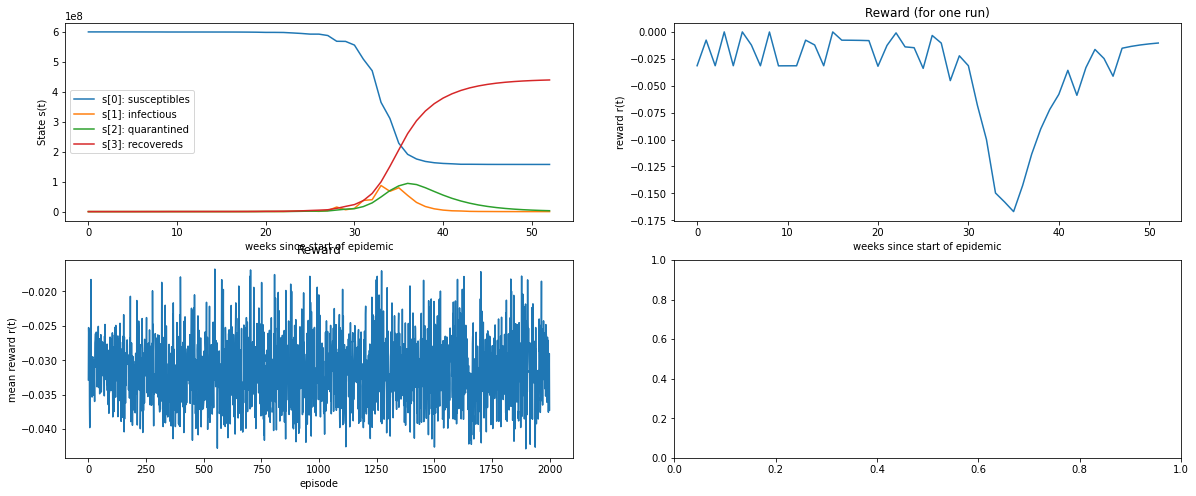

In [85]:
env = virl.Epidemic(stochastic=False, noisy=False)

bins = 10

def discretize(s, population=600000000, bins=bins):
    return np.round((np.log10(s/population +1)) * (bins-1)).astype(int)

episodes = 2000
avg_episode_rewards = []
Q = np.zeros((bins,bins,bins,bins, env.action_space.n))
epsilon = 1.0
for i in range(episodes):
    states = []
    rewards = []
    done = False

    s = env.reset()
    states.append(s)
    while not done:
        discretized_s = discretize(s)
        action = np.argmax(Q[(*discretized_s, None)])
        if np.random.random() > epsilon:
            action = np.random.choice(env.action_space.n)
        s, r, done, _ = env.step(action=action)
         
        q_sa = Q[(*discretized_s, action)]
        
        discretized_new_s = discretize(s)
        best = np.argmax(Q[(*discretized_new_s, None)])
        max_q_sa_next = Q[(*discretized_new_s, best)]
        
        new_q_sa = q_sa + 0.1 + (r + 0.9 * max_q_sa_next - q_sa)
        
        Q[(*discretized_s, action)] = new_q_sa
        
        states.append(s)
        rewards.append(r)
    epsilon*= 0.99
    if i % 20 == 0:
        print(i, "avg", sum(rewards) / len(rewards), "eps", epsilon, "Q", Q.sum())
    avg_episode_rewards.append(sum(rewards) / len(rewards))
analysis(states, rewards, avg_episode_rewards)

49980000000
